In [1]:
import pandas as pd
import numpy as np

In [2]:
advt = pd.read_csv( "Advertising.csv" )

In [3]:
advt.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advt = advt[["TV", "Radio", "Newspaper", "Sales"]]

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

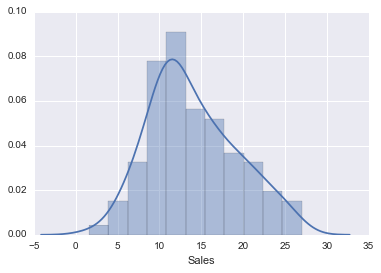

In [6]:
sns.distplot( advt.Sales )

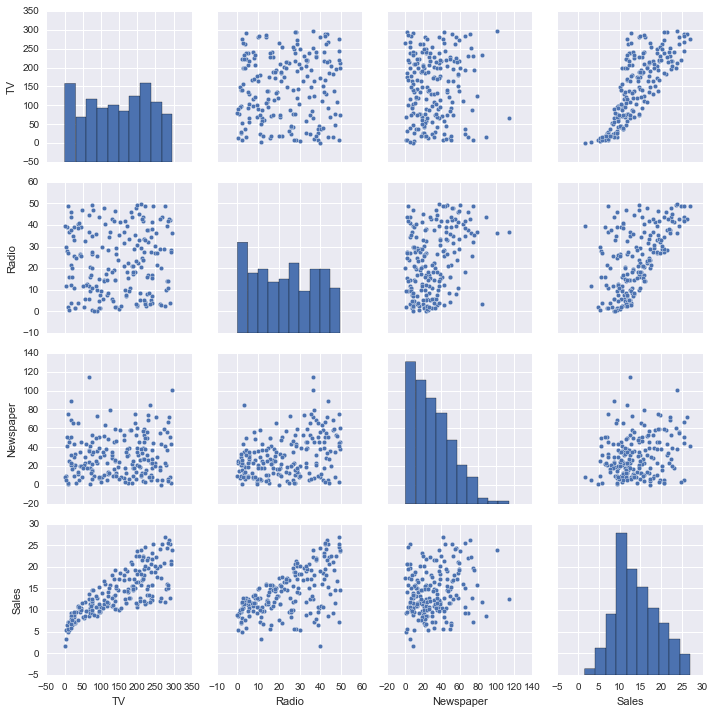

In [7]:
sns.pairplot( advt )

In [8]:
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
import statsmodels.formula.api as smf

In [10]:
lm = smf.ols( 'Sales ~ TV', advt ).fit()

In [11]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [12]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [13]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [14]:
lm.rsquared

0.61187505085007099

In [15]:
lmpredict = lm.predict( {'TV': advt.TV } )

In [16]:
lmpredict[0:10]

array([ 17.97077451,   9.14797405,   7.85022376,  14.23439457,
        15.62721814,   7.44616232,   9.76595037,  12.74649773,
         7.44140866,  16.53041431])

In [17]:
from sklearn import metrics

In [18]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )

In [20]:
rmse = np.sqrt( mse )
rmse

3.2423221486546887

In [21]:
lm.resid[1:10]

1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

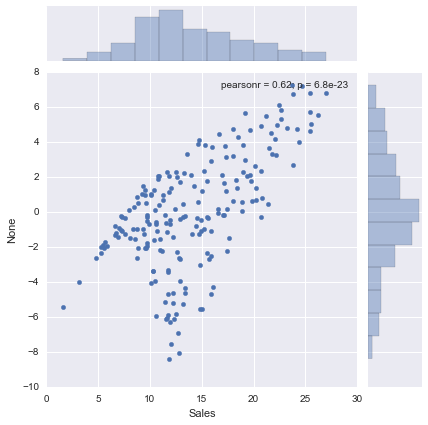

In [22]:
sns.jointplot(  advt.Sales, lm.resid )

In [23]:
lm = smf.ols( 'Sales ~ TV + Radio + Newspaper', advt ).fit()

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lreg = LinearRegression()

In [27]:
lreg.fit( advt[["TV", "Radio"]], advt.Sales )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lreg.intercept_

2.921099912405138

In [29]:
lreg.coef_

array([ 0.04575482,  0.18799423])

In [30]:
lpredict = lreg.predict( advt[["TV", "Radio"]] )

In [31]:
mse = metrics.mean_squared_error( advt.Sales, lpredict )

In [32]:
rmse = np.sqrt( mse )

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score( advt.Sales, lpredict )

0.89719426108289568

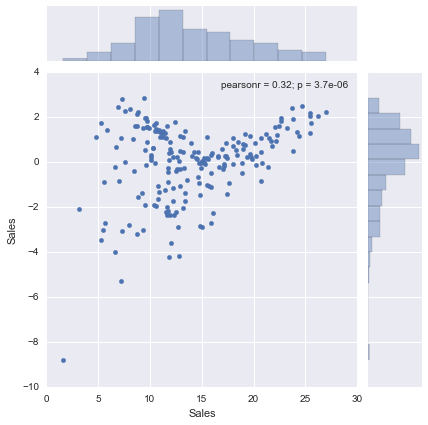

In [35]:
sns.jointplot(  advt.Sales, advt.Sales - lpredict )

In [36]:
from sklearn.feature_selection import f_regression

In [37]:
f_regression( advt[["TV", "Radio", "Newspaper"]], advt.Sales )

(array([ 312.14499437,   98.42158757,   10.88729908]),
 array([  1.46738970e-42,   4.35496600e-19,   1.14819587e-03]))

In [38]:

from sklearn.cross_validation import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
  advt[["TV", "Radio", "Newspaper"]],
  advt.Sales,
  test_size=0.3,
  random_state = 42 )